# Psychoinformatics - Week 15 (Exercises)
楊宗樺 (b05705050@ntu.edu.tw)

## 1 Face Detection (3 points)
Please use one face detection method/package of your choice to see if you can detect the faces in the following two pictures:

<img src="https://carwad.net/sites/default/files/face-cartoon-107543-9090554.jpg" width=20%>
<img src="https://i.imgur.com/zESfT.jpg" width=20%>

If so, why? If not, why not? 

Remember to explore the model parameters to make your conclusions parameter-independent.

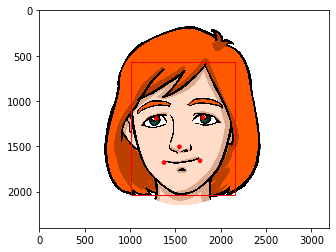

{'left_eye': (1290, 1193), 'right_eye': (1805, 1182), 'nose': (1545, 1505), 'mouth_left': (1375, 1679), 'mouth_right': (1772, 1660)}


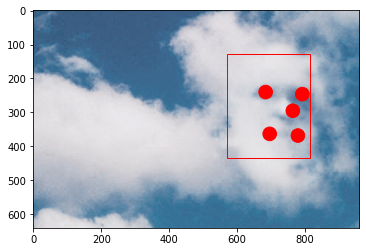

{'left_eye': (684, 240), 'right_eye': (792, 246), 'nose': (764, 295), 'mouth_left': (696, 363), 'mouth_right': (779, 368)}


In [14]:
from matplotlib.patches import Rectangle
from mtcnn import MTCNN
from matplotlib import pyplot as plt
import cv2
img_path = '15/face1.jpg'
img = plt.imread(img_path)
detector = MTCNN()
face=detector.detect_faces(img)
img_path2 = '15/face2.jpg'
img2 = plt.imread(img_path2)
face2=detector.detect_faces(img2)
for i in face:
    if i['confidence']<0.95:
        face.remove(i)
for i in face2:
    if i['confidence']<0.95:
        face2.remove(i)
def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
        for key, value in face['keypoints'].items():
            dot = plt.Circle(value, radius=20, color='red')
            ax.add_patch(dot)
    plt.show()
    

highlight_faces(img_path,face)
print(face[0]["keypoints"])
highlight_faces(img_path2,face2)
print(face2[0]["keypoints"])

我是延續上週作業所用的model繼續做這週的作業。
可以看出上面兩張圖都被匡出人臉，mtcnn會找出keypoints，其中就是有左眼右眼鼻子和左右嘴角，上圖兩張上面的紅色點點就是這五個面部器官所標記的部位。
但其實在雲朵的那張照片的右下角原本也有一張臉被匡起來，但我利用信心水準設置為0.95以上，將其排除。
mtcnn是相當厲害的演算法，不只直觀像是人臉的哪通圖，連相似人臉的雲朵都可以標示，此外也有信心水準為篩選的標準。

參考資料為 https://github.com/ipazc/mtcnn 
      https://www.sitepoint.com/keras-face-detection-recognition/

## 2 Audio Segementation (3 points) 
Please use one audio/speech segementation method of your choice (including your own codes) to calculate:

[1] the number of segments, and <br>
[2] the total speech duration of all the segments (seconds)

of each .wav file in https://ceiba.ntu.edu.tw/course/4671ea/content/speech.zip .

In the following example, there are 5 segements and the total speech duration is the sum of yellow(+blue) periods.

<img src="https://www.irit.fr/recherches/SAMOVA/assets/images/segmentation3.gif">

In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import glob
audio_list = glob.glob("speech/happy/*.wav") + glob.glob('speech/anger/*.wav')

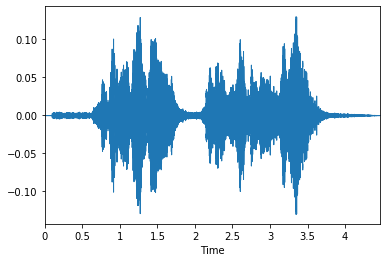

In [31]:
y, sr = librosa.load('speech/happy/53_F_H_6.wav', sr=None, mono=True)
librosa.display.waveplot(y, sr)

In [45]:
for i in audio_list:
    decibel=30 #由上圖去調節設定當作靜音分貝
    y, sr = librosa.load(i, sr=None, mono=True) 
    yy=librosa.effects.split(y,top_db=decibel)
    seg_amount = yy.shape[0]
    total_duration = .0
    for ii in range(seg_amount):
        total_duration += librosa.get_duration(y[yy[ii][0]:yy[ii][1]])
    print(f" {i}\t the number of segments: {seg_amount}\t  total speech duration: {total_duration} sec" )

 speech/happy/51_F_H_6.wav	 the number of segments: 2	  total speech duration: 5.897868480725624 sec
 speech/happy/68_M_H_6.wav	 the number of segments: 2	  total speech duration: 4.829750566893424 sec
 speech/happy/62_F_H_6.wav	 the number of segments: 1	  total speech duration: 4.620770975056689 sec
 speech/happy/56_F_H_7.wav	 the number of segments: 3	  total speech duration: 5.712108843537415 sec
 speech/happy/69_M_H_7.wav	 the number of segments: 1	  total speech duration: 6.339047619047619 sec
 speech/happy/53_F_H_6.wav	 the number of segments: 2	  total speech duration: 5.781768707482993 sec
 speech/happy/66_F_H_6.wav	 the number of segments: 1	  total speech duration: 6.246167800453515 sec
 speech/happy/74_F_H_6.wav	 the number of segments: 2	  total speech duration: 6.919546485260771 sec
 speech/happy/75_F_H_7.wav	 the number of segments: 1	  total speech duration: 6.8034467120181406 sec
 speech/happy/59_F_H_7.wav	 the number of segments: 2	  total speech duration: 5.503129251